In [65]:
import numpy as np
import math
import matplotlib.pyplot as plt


#### Ex 1.1
Implementation of the method proposed of linear regression.

Here we are computing the initial set of points.

In [66]:

x = np.linspace(-10,10,100)
m = [0.,0.]
angle = 45*math.pi/180

rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

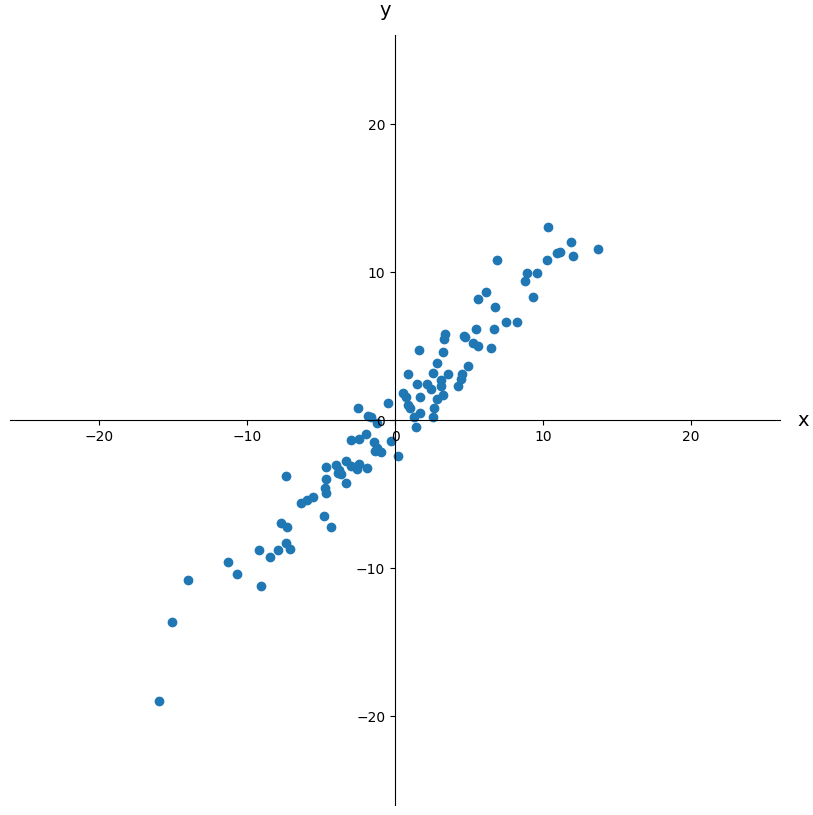

In [67]:
# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -25, 25, -25, 25
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)



plt.show()

These are the related points that we will work through this first exercise.

In [68]:
def mse(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y, y_hat)
    squared_differences = np.square(differences)
    return squared_differences.mean()

In [69]:
def function_2(W,X):
  return W

def gradf_2(W,X):
    y= []
    y_hat = []
    for point in X:
        predict = W[0]*point[0]+W[1]
        y_hat.append(predict)
        y.append(point[1])
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y_hat, y)
    return np.array([ np.sum(np.multiply(differences,X[:,0])),np.sum(differences) ])


def back_prop(W,X,w_history,alpha = 0.0001,iter=0):
    w_history.append(W)
    W = np.subtract(W,np.multiply(alpha ,gradf_2(W,X)))
    if iter>1000:
        w_history.append(W)
        return [len(w_history)-1, w_history]
    else:
        res = back_prop(W,X, w_history,iter=iter+1)

    return res

In [70]:

itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.99229681 0.11765794]


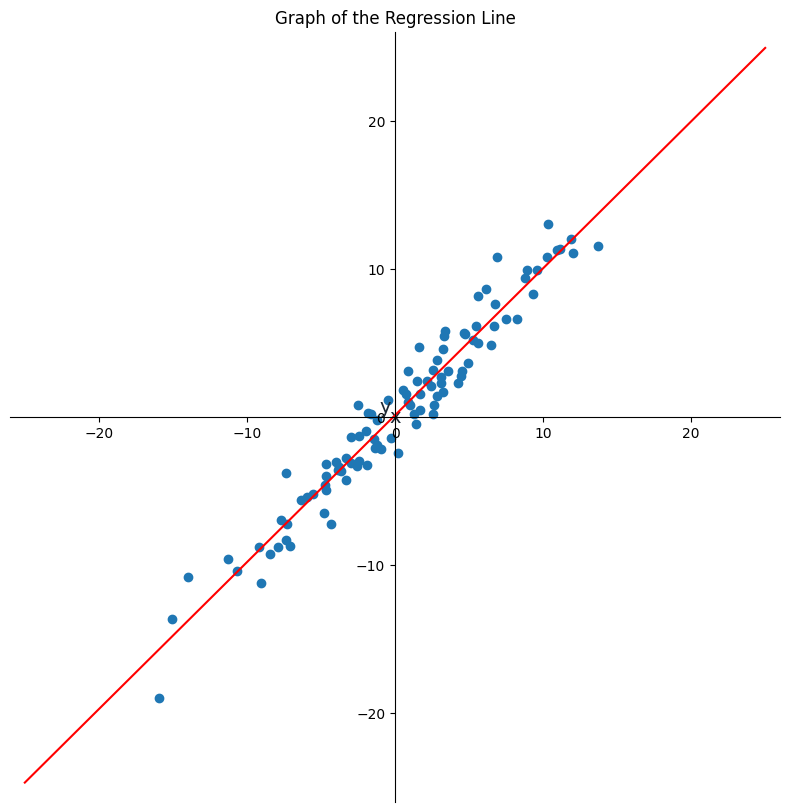

In [71]:
# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -25, 25, -25, 25
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line
x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

The red line is the regression line that resulted from the gradient descent algorithm. We can see that it goes through the blue points at the correct angle, thus linear Regression with least squares as an error function works well for this set of points.

### Ex1.2

The aim of this exercise is to show the impact of outlier points. To show this, we will change the coordinates of a point to (-40,20).


In [72]:
points[1]=[-40,20]
itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.55631982 0.7001924 ]


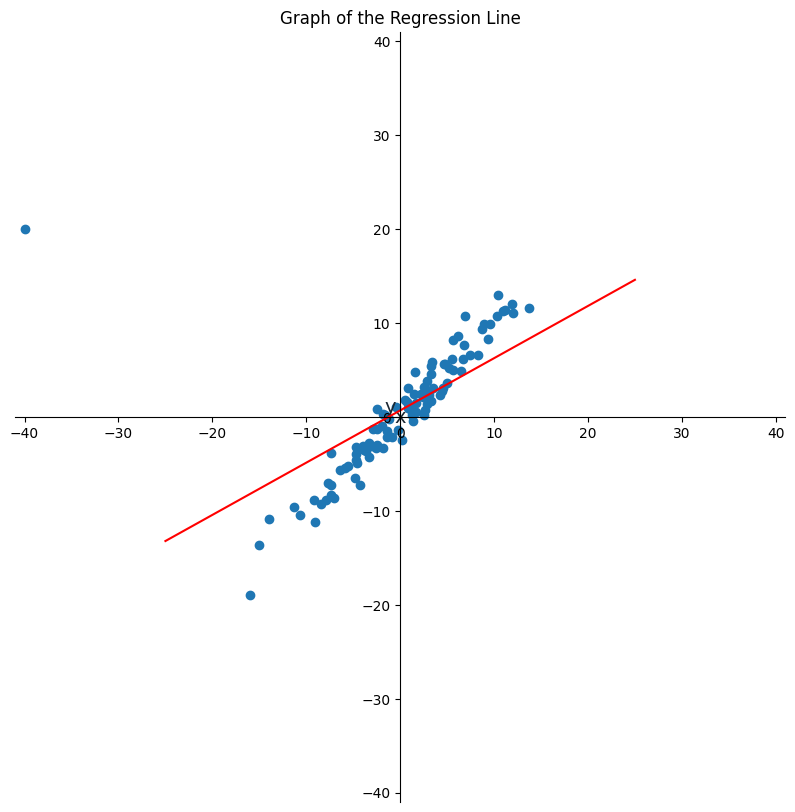

In [73]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -40, 40, -40, 40
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line


x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

We can quite easily observe that the line is a bit to up than it should be, thus the impact of one outlier can be seen.

Now, to further showcase the impact of the outlier points, we will change 3 other points to the following values
(-41,40)
(30,50)
(-10,40)

In [74]:
points[1]=[-41,40]
points[2]=[30,50]
points[3]=[-10,40]

itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.49894834 1.65779881]


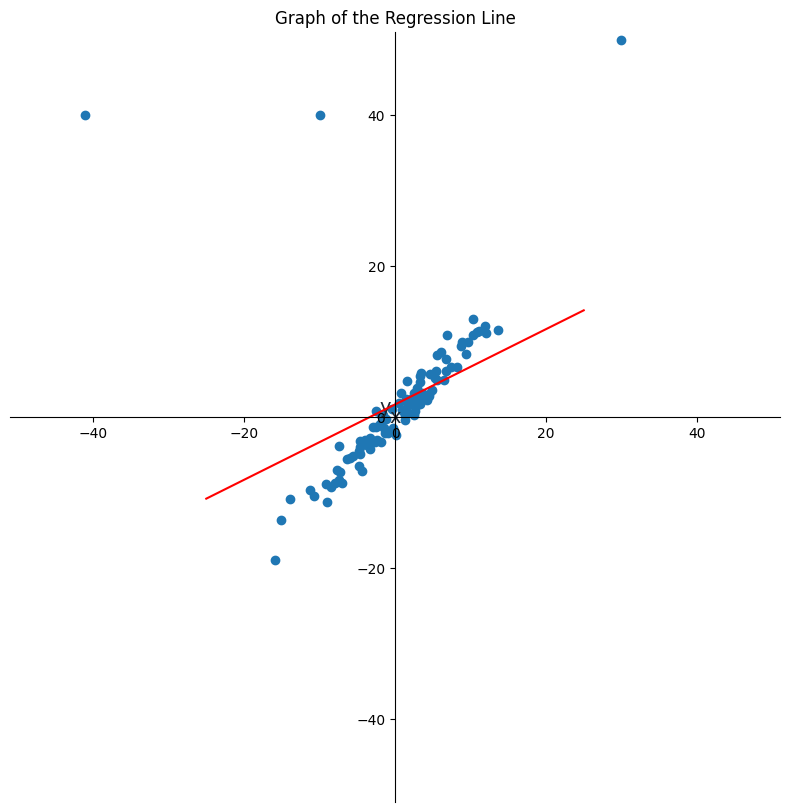

In [75]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -50, 50, -50, 50
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line


x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

We can very easily note that the magnitude by which those 3 points changed our regression line is huge. The importance of catching outliers is thus shown.


## Robust linear regression
#### Nils Lennier Mattiß, Federica Valeau, Eduard Mihai
#### 2.1
From the following plot we can notice how different the least square function and the Cauchy function are. The first one gives much more importance to the errors with high absolute value, while the second one is more robust. I. e. it only weighs these errors up to a certain level and afterwards the impact stays the same.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

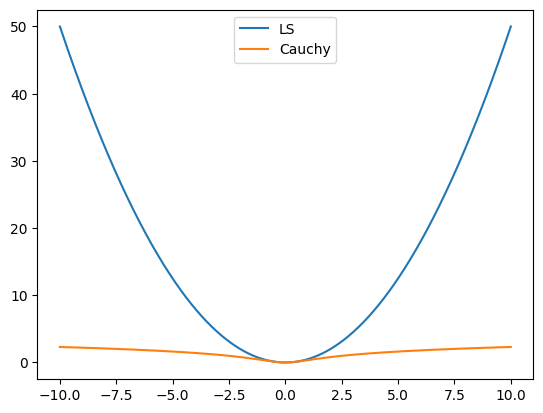

In [77]:
def LS(x):
    return 0.5*x**2

def cauchy(x, c=1):
    return c**2 * 0.5 * np.log(1+(x/c)**2)

x = np.linspace(-10, 10, 1000)
plt.plot(x, LS(x), label='LS')
plt.plot(x, cauchy(x, 1), label='Cauchy')
plt.legend()
plt.show()


#### 2.2
Now we will find the weights using the Cauchy error function and by backtracking.


$\begin{align} Q(x,y,w_0,w_1) &= \frac{c^2}{2} \sum_{i=i}^m \log [1+(\frac{\hat{y_i}-y_i}{c})^2] \\
    &=  \frac{c^2}{2} \sum_{i=i}^m \log [1+(\frac{w_0 x_i+w_1-y_i}{c})^2] \\
    &= \frac{c^2}{2} \sum_{i=i}^m \log [1+(\frac{\hat{y_i}-y_i}{c})^2] =: \tilde{f_c}(\hat{y_i})
    \end{align}$

For $\hat{y_i}=w_0 x_i+w_1$



And the partial derivatives will be:

$\begin{align*}
 \frac{\partial Q}{\partial w_0}(w_0, w_1) &= \frac{d\tilde{f_c}}{dy}(\hat{y})\frac{\partial \hat{y}}{\partial w_0}(w_0, w_1) \\
    &= c^2 \sum_{i=1}^m \frac{1}{1+(\frac{\hat{y_i}-y_i}{c})^2} \frac{x_i(\hat{y_i}-y_i)}{c^2}\\
    &= \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)}{1+(\frac{w_0 x_i+w_1-y_i}{c})^2} x_i \\
\frac{\partial Q}{\partial w_1}(w_0, w_1) &= \frac{d \tilde{f_c}}{dy}(\hat{y}) \frac{\partial \hat{y}}{\partial w_0}(w_0, w_1) \\
    &= c^2 \sum_{i=1}^m \frac{1}{1+(\frac{\hat{y_i}-y_i}{c})^2} \frac{\hat{y_i}-y_i}{c^2}\\
    &= \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)}{1+(\frac{w_0 x_i+w_1-y_i}{c})^2} \\
\nabla Q(w) &= \Big(\frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1} \Big)
\end{align*}$

The weights will be estimated by the backtraking algorithm

$ w^{k+1} = w^k - \alpha^k \nabla Q(w) $

In [78]:
#define points new

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

In [79]:
def grad_cauchy(x, ps, c=1):
    dw0 = []
    dw1 = []
    for i in range(len(ps)):

        diff = x[0]*ps[i, 0]+x[1]-ps[i, 1]
        #print(diff, c, 1+(diff/c)**2)
        dw0.append(ps[i, 0]*(diff)/(1+(diff/c)**2))
        dw1.append((diff)/(1+(diff/c)**2))
    return np.array([np.sum(dw0), np.sum(dw1)])

def grad_descent(W, alpha, w_his, ps, grad, numIts=1000):
  for i in range(numIts):
      gr = grad(W, ps)
      W = np.subtract(W, np.multiply(alpha, grad(W, ps)))
      w_his.append(W)
      diffs = W[0]*ps[:,0]+W[1]-ps[:,1]
  return w_his

weights = grad_descent([2,8], 0.001, [], points, grad_cauchy)
print(weights[-1])

[0.97234061 0.18523967]


#### 2.3
First we caclulate the weights using the least squares method, like we did before.

In [80]:
def gradf_2(W,X):
    y= []
    y_hat = []
    for point in X:
        predict = W[0]*point[0]+W[1]
        y_hat.append(predict)
        y.append(point[1])
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y_hat, y)
    return np.array([ np.sum(np.multiply(differences,X[:,0])),np.sum(differences) ])


def back_prop(W,X,w_history,alpha = 0.0001,iter=0):
    w_history.append(W)
    W = np.subtract(W,np.multiply(alpha ,gradf_2(W,X)))
    if iter>700:
        w_history.append(W)
        return [len(w_history)-1, w_history]
    else:
        res = back_prop(W,X, w_history,iter=iter+1)
    return res

itera, w_LS = back_prop(np.array([2, 8]),points, [])
print(w_LS[-1])

[0.96465496 0.13268245]


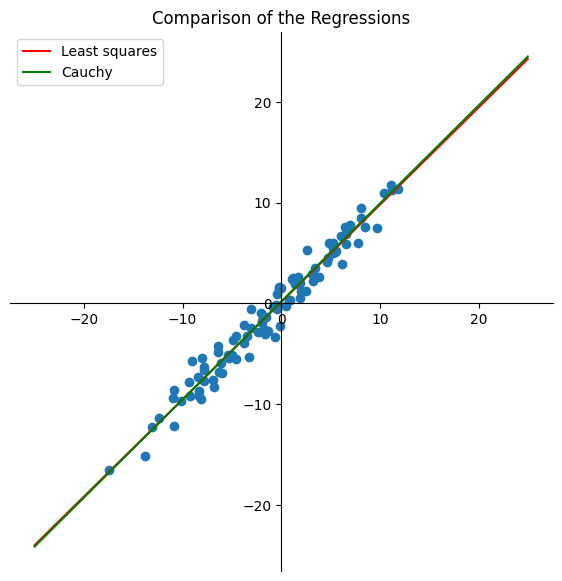

In [81]:
xs = points[:,0]
ys = points[:,1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(xs, ys)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = np. linspace(-25,25,100)
y = w_LS[-1][0]*x+w_LS[-1][1]
z = weights[-1][0]*x+weights[-1][1]
plt. plot(x, y, '-r', label='Least squares')
plt.plot(x, z, '-g', label='Cauchy')
plt. title('Comparison of the Regressions')

plt.legend()
plt.show()


From the plot we can observe that without outliers the obtained regression lines are very similar, in fact by looking at the plots in 2.1, the Cauchy and Least Squares functions assume similar values when they are close to zero, for this reason we expect to see a bigger variation when having several outliers.

#### 2.4
Now we will add 4 more points and we will see how this will impact the regression lines. The points that we will add are (-40, 20), (40, -20), (-20, 40) and (20, -40).

In [82]:
points_outliers = np.append(points, [[-40, 20], [40, -20], [-20, 40], [20, -40]], axis=0)
itera, w_LS = back_prop(np.array([2, 8]), points_outliers, [])
print('New weights with outliers for least squares:', w_LS[-1])

weights = grad_descent([2,8], 0.001, [], points_outliers, grad_cauchy)
print('New weights with outliers for Cauchy:', weights[-1])

New weights with outliers for least squares: [ 0.08381566 -0.6621785 ]
New weights with outliers for Cauchy: [0.97076462 0.1850386 ]


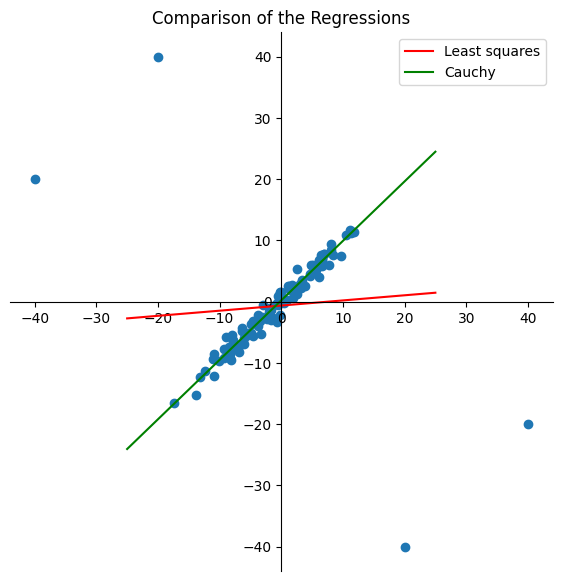

In [83]:
xs = points_outliers[:,0]
ys = points_outliers[:,1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(xs, ys)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = np. linspace(-25,25,100)
y = w_LS[-1][0]*x+w_LS[-1][1]
z = weights[-1][0]*x+weights[-1][1]
plt. plot(x, y, '-r', label='Least squares')
plt.plot(x, z, '-g', label='Cauchy')
plt. title('Comparison of the Regressions')

plt.legend()
plt.show()


As we can see from the plot, the difference between the two regression lines is quite big; the Cauchy error functin is way more robust against outliers, in fact nonetheless the presence of four outliers, it still gives a very good approximation of the behaviour of the dataset. 

Vice-versa, the least squares approximation doesn't perform good and it gets easily "distracted" by the presence of a few outliers.

#### 2.5
Let's play around with the parameter $c$ of the cauchy function.
First have a look at the functions for different c`s

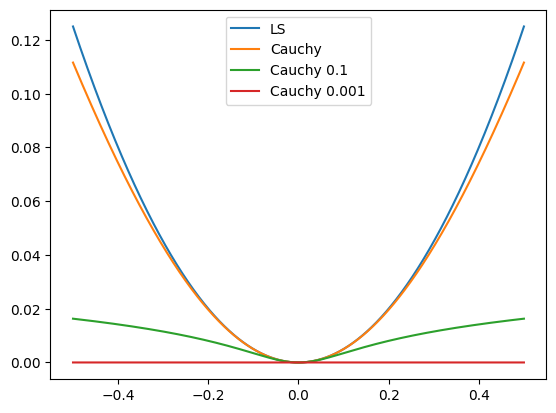

In [84]:
def LS(x):
    return 0.5*x**2

def cauchy(x, c=1):
    return c**2 * 0.5 * np.log(1+(x/c)**2)

x = np.linspace(-0.5, 0.5, 1000) # try out the different borders from the explanation below
plt.plot(x, LS(x), label='LS')
plt.plot(x, cauchy(x, 1), label='Cauchy')
#plt.plot(x, cauchy(x, 100), label='Cauchy 100')
plt.plot(x, cauchy(x, 0.1), label='Cauchy 0.1')
plt.plot(x, cauchy(x, 0.001), label='Cauchy 0.001')
plt.legend()
plt.show()

For big $c$ the cauchy function is approximately the same as the standard parabel, thus we get nearly the same results too.
For lower $c$ we get a quadratic behaviour for a small interval and stay nearly constant afterwards, so the error function doesn't really care whether a point is 5 points or 100 points away.
Note that this behaviour leads to a very small gradient in these areas, which results in a very hard optimisation problem. Thus we choose initial Weights that are kinda close to our desired optimum as starting points, to not be in the need to perform to many steps of gradient descent with a high learning rate for the latter experiments.
The standard Cauchy function has the quadratic behaviour until about $|x| = 0.5 $ and starts to flatten out via linear behaviour afterwards. For $c=0.01$ this only holds up until about $|x| = 0.025 $ and for $c=0.001$ it only holds up until $|x| = 0.00025 $

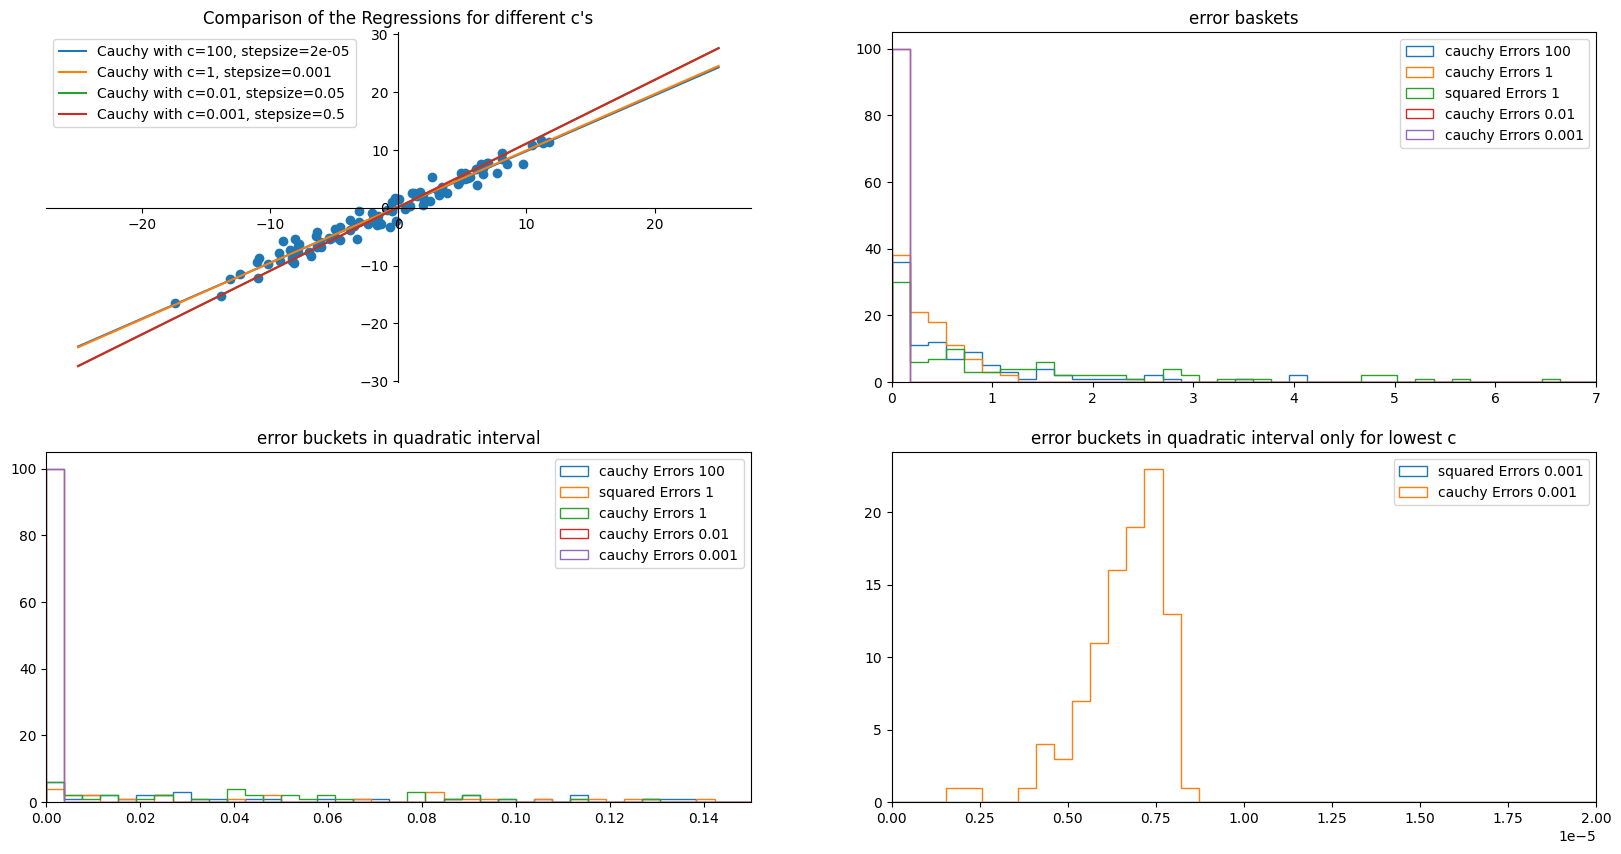

In [87]:

xs = points[:,0]
ys = points[:,1]

fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(20, 10))

ax.scatter(xs, ys)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.set_xlim(0, 0.15)
ax1.set_xlim(0, 7)
ax3.set_xlim(0, 0.00002)

x = np.linspace(-25,25,100)

cs = [100, 1, 1/100, 1/1000] #to get possible stepsizes np.array([1/1000, 1/1000, 1/1000, 1/1000, 1/1000, 1/1000])*1000000
stepsizes = [0.00002, 0.001, 0.05, 0.5] #to get possible stepsizes np.array([0.01, 0.1, 0.5, 0.8, 1, 2])/1000

for c, stepsize in zip(cs, stepsizes):
    weights = grad_descent([1.1,0.1], stepsize, [], points, lambda x, ps: grad_cauchy(x, ps, c), 20000)
    #print(weights[-1])
    z = weights[-1][0]*x+weights[-1][1]
    ax.plot(x, z, label=f'Cauchy with c={c}, stepsize={stepsize}')
    errs = np.multiply(weights[-1][0], xs) + weights[-1][1] - ys

    ax1.hist(cauchy(errs, c), np.linspace(0,7,40), histtype=u'step', label=f"cauchy Errors {c}")
    #print(np.sum(cauchy(errs, c)))
    #to get a clearer plot, bc all curves are similar
    if c==1: #TRUE
        ax2.hist(abs(errs)**2, np.linspace(0,0.15,40), histtype=u'step', label=f"squared Errors {c}")
        ax1.hist(abs(errs)**2, np.linspace(0,7,40), histtype=u'step', label=f"squared Errors {c}")
    ax2.hist(cauchy(errs, c), np.linspace(0,0.15,40), histtype=u'step', label=f"cauchy Errors {c}")
    if c == 0.001:
        ax3.hist(abs(errs)**2, np.linspace(0,0.00002,40), histtype=u'step', label=f"squared Errors {c}")
        ax3.hist(cauchy(errs, c), np.linspace(0,0.00002,40), histtype=u'step', label=f"cauchy Errors {c}")


ax.set_title("Comparison of the Regressions for different c's")
ax1.set_title("error baskets")
ax2.set_title("error buckets in quadratic interval")
ax3.set_title("error buckets in quadratic interval only for lowest c")

ax1.legend()
ax2.legend()
ax3.legend()
ax.legend()
plt.show()

Let's look at the plots. First of all there is not that much of a difference for the different c's in the regression curve it self. But the error histograms show the difference between the used methods.
For $c=100$ the abs value curve and the curve of the cauchy errors are very similiar as expected.
For all the other methods it is clearly visible, that higher errors only arise for the absolute Values squared and not for the cauchy error itself. And the higher the error, the higher the $c$, i.e. c="0.001" only has errors smaller than 0.005, but in the before mentioned "quadratic" intervals the histograms can again not be differentiated from the absolute values.



#### 2.6

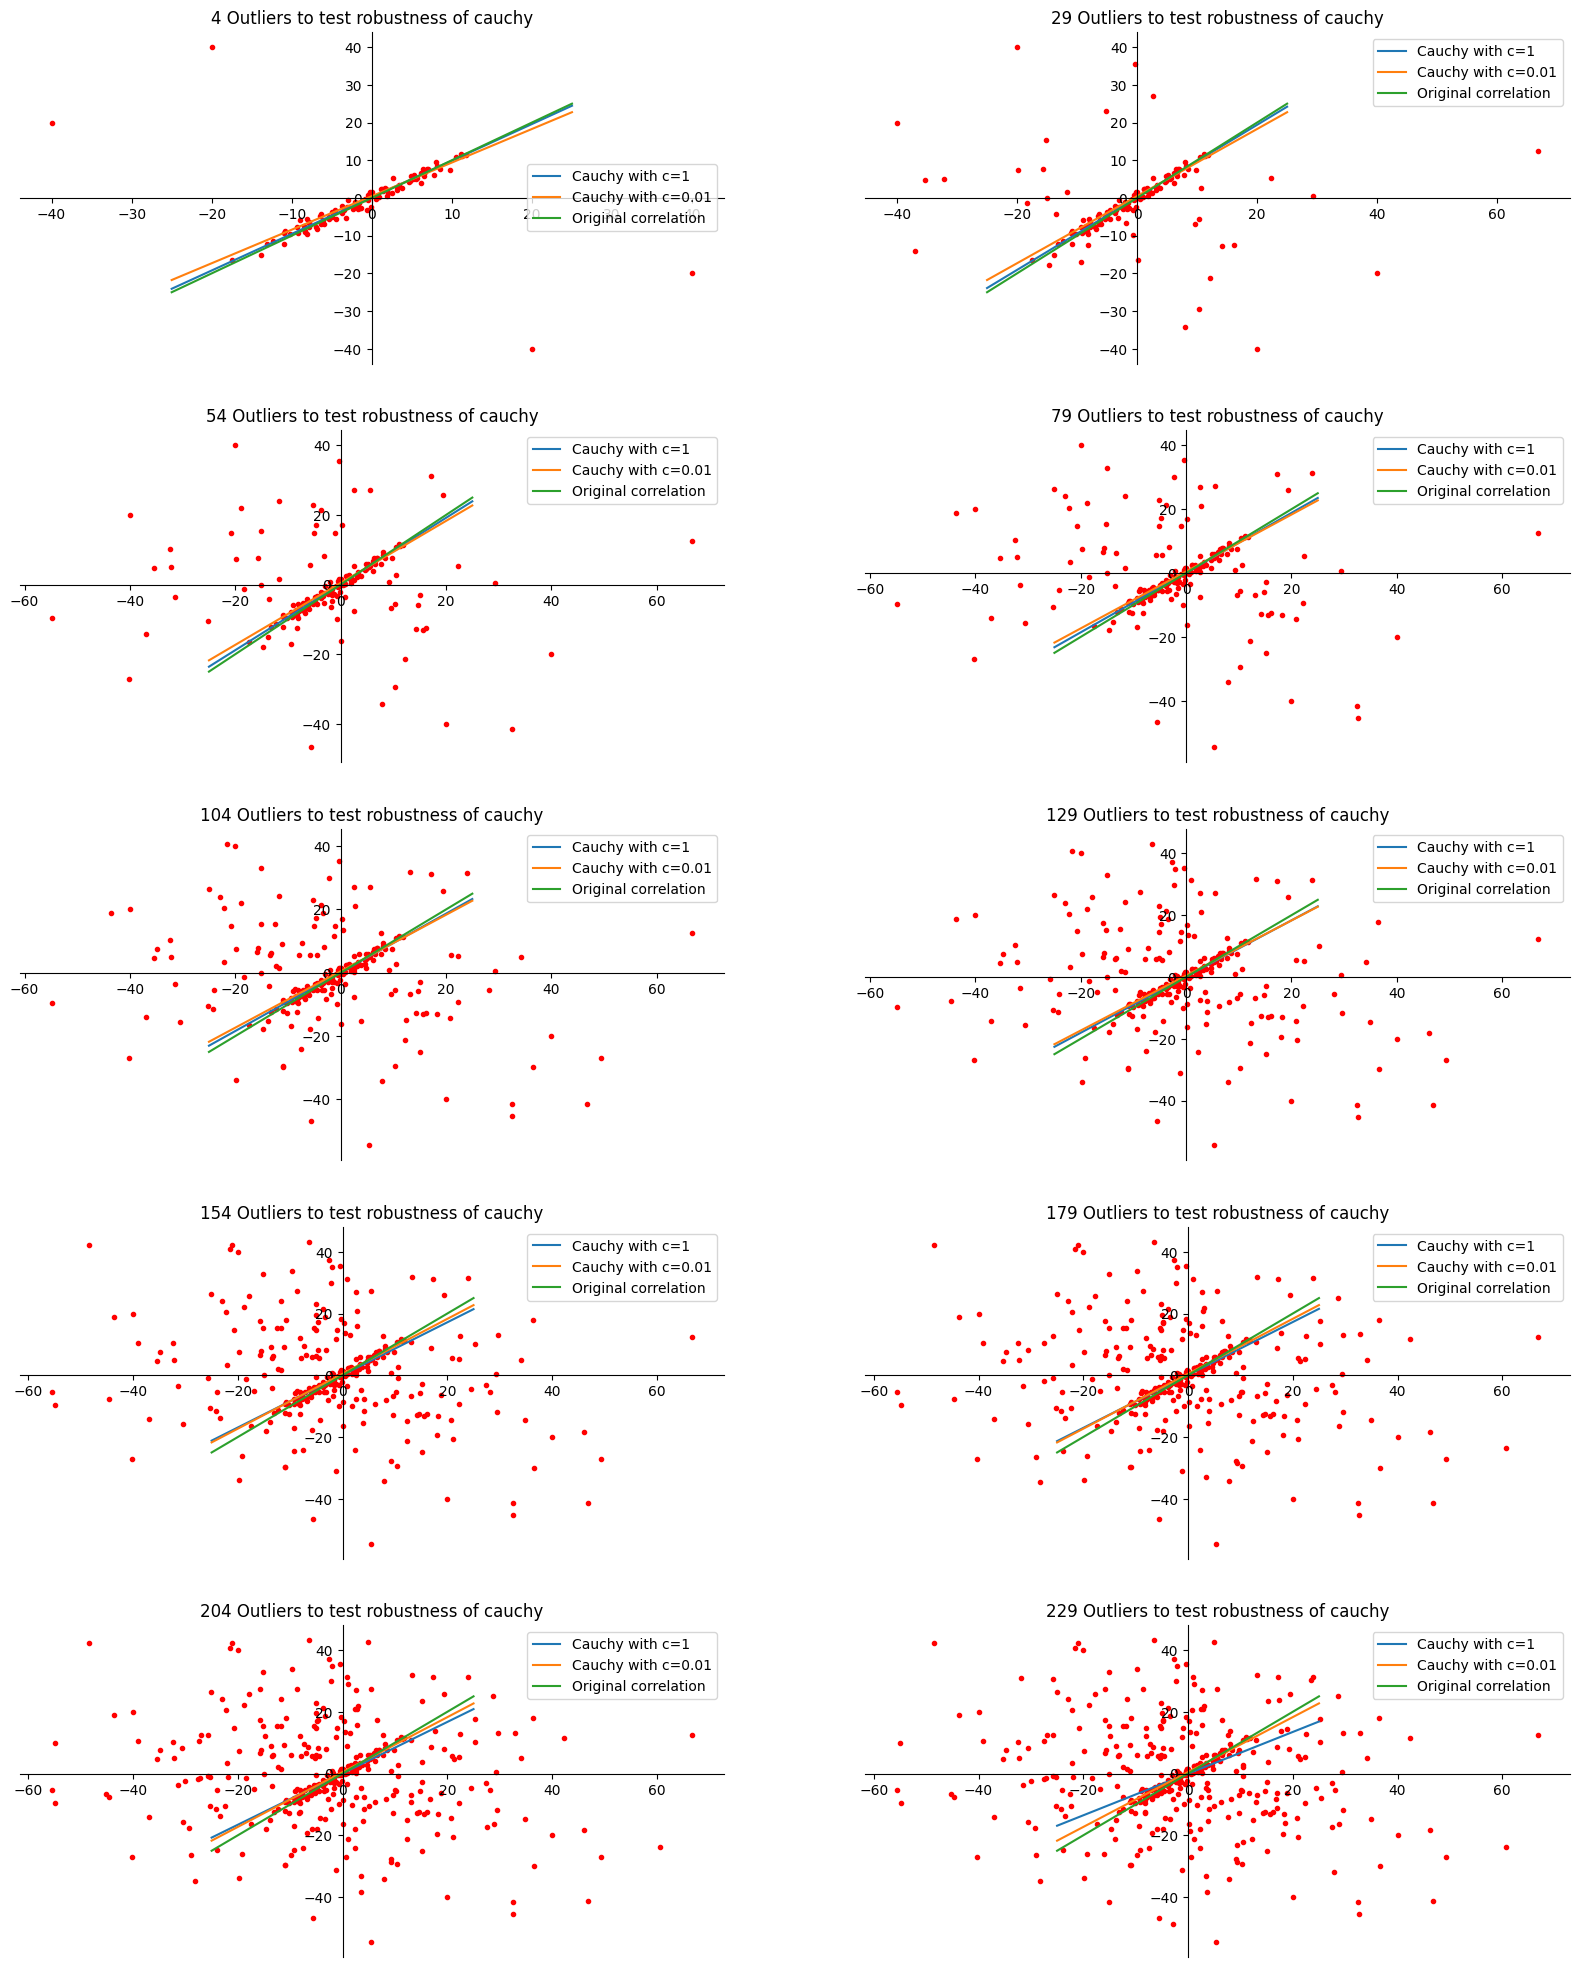

In [86]:
cs = [1, 0.01]
stepsizes = [0.001, 0.05]
x = np.linspace(-25,25,100)

#create 6 plots
vert = 5
hor = 2
plot_every = 5
fig, axs = plt.subplots(vert,hor, figsize=(10*hor, 5*vert))
num_adds = vert*hor*plot_every
points_outliers = np.append(points, [[-40, 20], [40, -20], [-20, 40], [20, -40]], axis=0)
for i in range(num_adds):
    if i%plot_every == 0:
        j = i//plot_every
        xs = points_outliers[:,0]
        ys = points_outliers[:,1]
        axs[j//hor, j%hor].scatter(xs, ys, color="r", marker=".")
        axs[j//hor, j%hor].spines['bottom'].set_position('zero')
        axs[j//hor, j%hor].spines['left'].set_position('zero')
        axs[j//hor, j%hor].spines['top'].set_visible(False)
        axs[j//hor, j%hor].spines['right'].set_visible(False)


        for c, stepsize in zip(cs, stepsizes):
            #itera, w_LS = back_prop(np.array([2, 8]),points_outliers, [])
            #z_LS = w_LS[-1][0]*x+w_LS[-1][1]
            #axs[i//hor, i%hor].plot(x, z_LS, label=f'Least squares')
            weights = grad_descent([0.9,0.5], stepsize, [], points_outliers, lambda x, ps: grad_cauchy(x, ps, c), 20000)
            z = weights[-1][0]*x+weights[-1][1]
            axs[j//hor, j%hor].plot(x, z, label=f'Cauchy with c={c}')
        axs[j//hor, j%hor].plot(x, x, label=f'Original correlation')
        axs[j//hor, j%hor].set_title(f"{i*5+4} Outliers to test robustness of cauchy")
        axs[j//hor, j%hor].legend()
    #add new points
    points_outliers = np.append(points_outliers, [[np.random.normal(0, 20), np.random.normal(0, 20)], [np.random.normal(0, 20), np.random.normal(0, 20)], [np.random.normal(0, 20), np.random.normal(0, 20)], [np.random.normal(0, 20), np.random.normal(0, 20)], [np.random.normal(0, 20), np.random.normal(0, 20)], [np.random.normal(0, 20), np.random.normal(0, 20)]], axis=0)

We add 5 new points to the already existing points with the previous outliers. All normally distributed around (0,0) and plot the results.
As we can see the cauchy function is really robust against outliers for $c=1$ and for $c=0.01$ but still the regression lines slowly loose slope due to the random noise. But a LS Curve would get out of hand really quickly due to the noise, while the Cauchy function still keeps the original causalities. It seems a bit weird to be able to add more noise than correlated variables and still get a good curve, but after doubling the noise (200 Noisy points, 100 related points) the cauchy function becomes very flat too. For $c=0.01$ this seems to not be the case, but that may also be caused by the hard optimisation and the vanishing gradients.